In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml

In [15]:
#para poner las rutas de los archivos en otro documento y esta funcion es para leer dicho documento

try:
    with open(r"C:\Users\germa\Documents\GitHub\Proyect_vanguard\config.yaml", 'r') as file:
        config = yaml.safe_load(file) 
except Exception as e:
    print(f"Error reading the config file: {e}")




In [16]:
df1 = pd.read_csv(config['data']['demo'])
df2 = pd.read_csv(config['data']['experimet_clients'])
df3 = pd.read_csv(config['data']['pt_1'])
df4 = pd.read_csv(config['data']['pt_2'])

In [17]:
df1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [19]:
df2

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [20]:
#Eliminamos los usuarios que no participan en la prueba
df2 = df2.dropna(subset = ["Variation"])

In [21]:
#Juntamos las dos tablas que contenian datos de los usuarios
df_clientes = pd.merge(df2, df1, on='client_id')

In [22]:
df_clientes

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [23]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.DataFrame(df_clientes.describe())

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,50500.00,50488.00,50488.00,50487.00,50488.00,50488.00,50488.00,50488.00
mean,5006179.06,12.03,150.42,47.32,2.25,149514.68,3.09,6.13
std,2877442.53,6.86,81.94,15.52,0.53,302036.42,2.19,2.18
min,555.00,2.00,33.00,17.00,1.00,23789.44,0.00,3.00
25%,2515645.75,6.00,82.00,33.50,2.00,39878.41,1.00,4.00
50%,5025103.50,11.00,136.00,48.00,2.00,65733.60,3.00,6.00
75%,7477933.25,16.00,192.00,59.50,2.00,139956.54,5.00,8.00
max,9999832.00,55.00,669.00,96.00,7.00,16320040.15,6.00,9.00


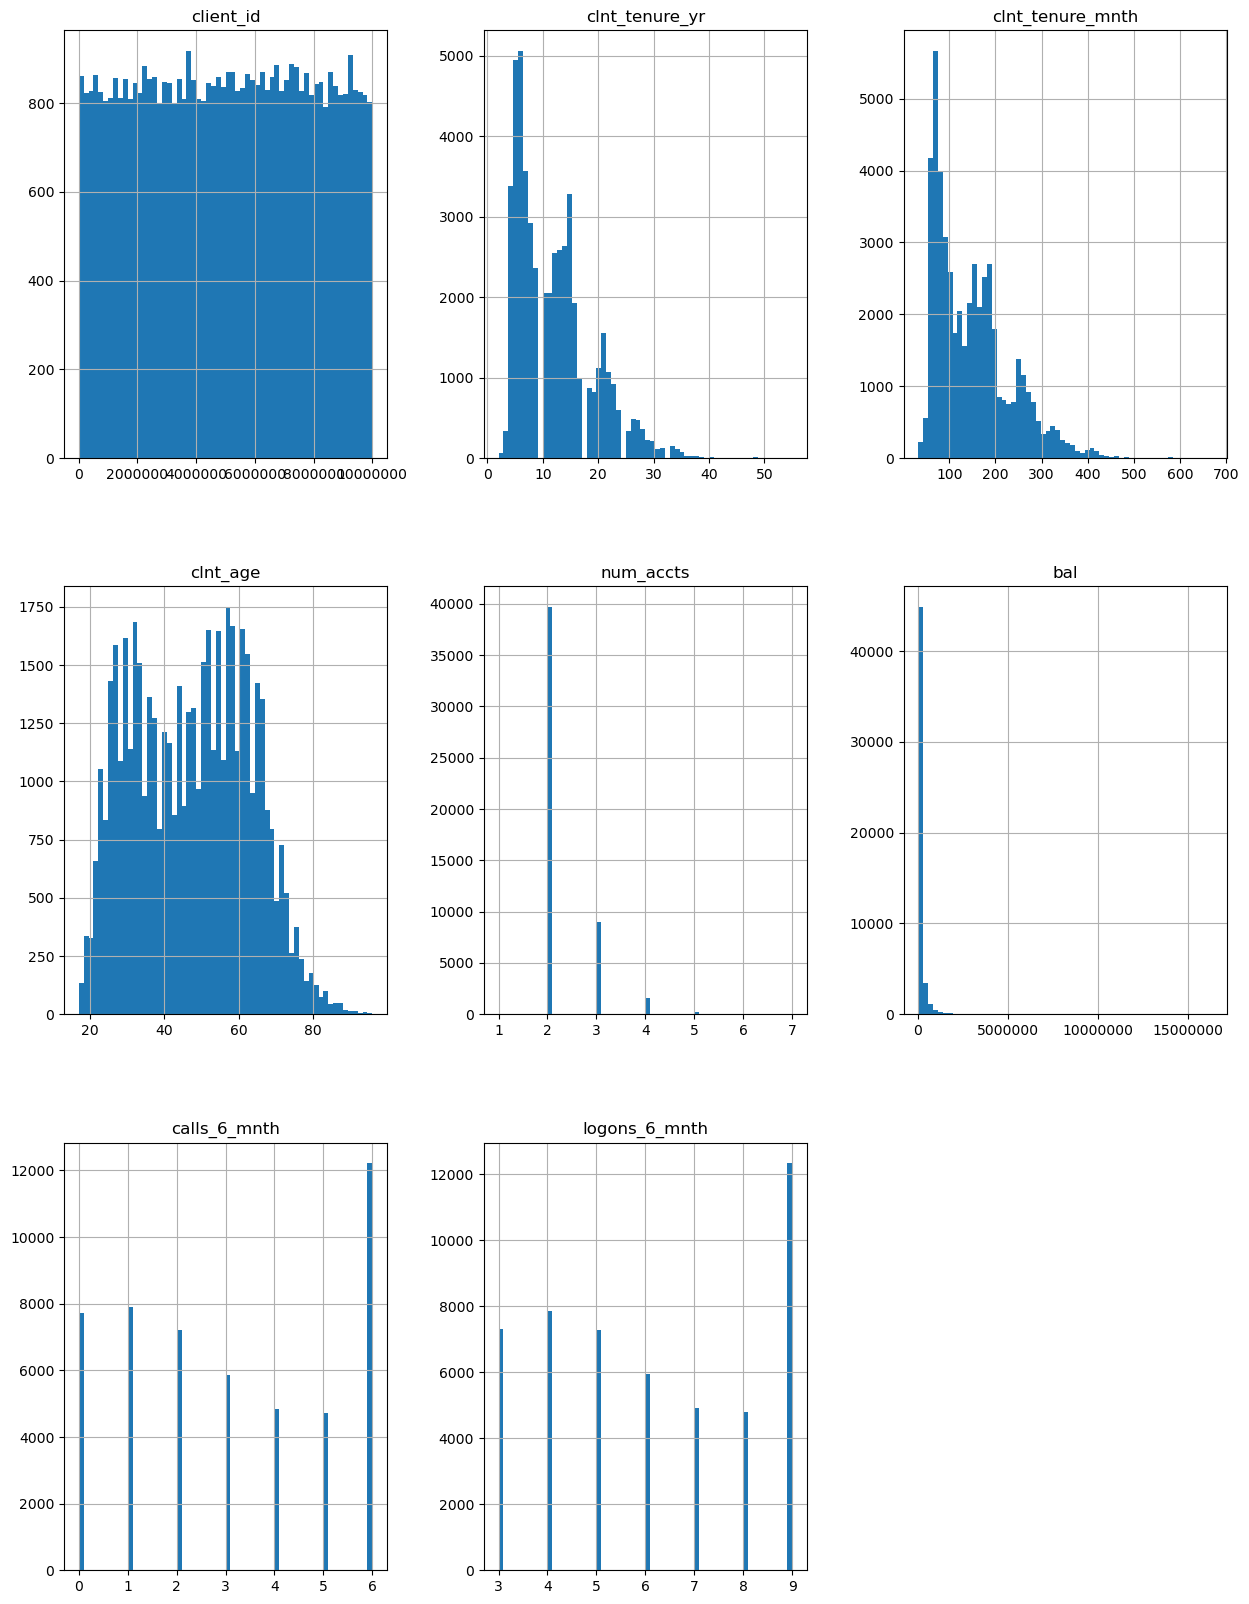

In [24]:
ax = df_clientes.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
for axis in ax.flatten():
    axis.ticklabel_format(style='plain', axis='x')

plt.show()

En este histograma podemos ver que la mayoria de los clientes que participaron en las pruebas han estado en la applicacion menos de 10 anyos aunque hay otro numero bastante grande que han estado 12-16 anyos.
En el tema de las edades esta muy bien repartido ya que como podemos ver la mayoria se situa entre 24 y 66 anyos.

In [25]:
#Eliminamos las tablas de bal y num_accts ya que mas del 80% son iguales y no nos afecta en esta prueba y tambien la de antiguedad por mes ya que cogeremos las antiguedades por anyo.
columnas_eliminar = ["clnt_tenure_mnth", "num_accts", "bal"]

df_clientes = df_clientes.drop(columns=columnas_eliminar)

In [26]:
df_clientes['gendr'].value_counts()

gendr
U    17280
M    16947
F    16259
X        2
Name: count, dtype: int64

In [27]:
#Aqui cojemos los dos generos que estaban con X y los cambiamos por U.

df_clientes["gendr"] = df_clientes["gendr"].replace({"X":"U"})

<Axes: ylabel='count'>

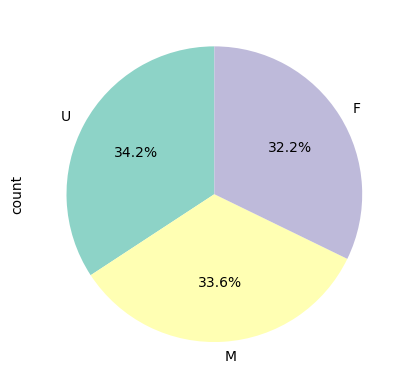

In [28]:
df_clientes['gendr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
#Aqui vemos que un tercio no nos han especificado de que genero son.

<Axes: ylabel='count'>

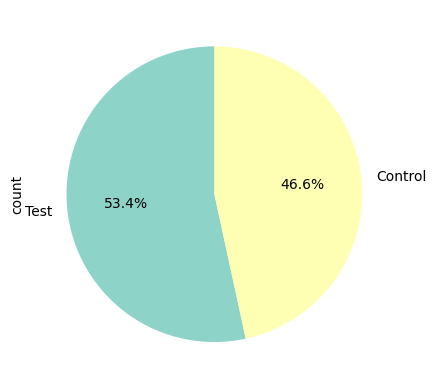

In [29]:
df_clientes['Variation'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
#Aqui podemos ver que hay mas gente en la prueba de test que en la de control.

In [30]:
df_clientes[df_clientes["clnt_age"].isnull()]

,client_id,Variation,clnt_tenure_yr,clnt_age,gendr,calls_6_mnth,logons_6_mnth
5171,8191345,Control,NaN,NaN,NaN,NaN,NaN
7131,5144725,Test,NaN,NaN,NaN,NaN,NaN
8902,7616759,Control,NaN,NaN,NaN,NaN,NaN
18742,2222915,Test,NaN,NaN,NaN,NaN,NaN
19391,5277910,Test,NaN,NaN,NaN,NaN,NaN
23678,8412164,Test,NaN,NaN,NaN,NaN,NaN
36137,8611797,Control,NaN,NaN,NaN,NaN,NaN
36245,355337,Control,NaN,NaN,NaN,NaN,NaN
38552,4666211,Control,8.00,NaN,F,4.00,7.00
38599,1227228,Test,NaN,NaN,NaN,NaN,NaN


In [31]:
#Miramos los datos de los clientes que no tienen edad y al no tener ningun otro dato los eliminamos.
df_clientes = df_clientes.dropna()

In [32]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50487 entries, 0 to 50499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       50487 non-null  int64  
 1   Variation       50487 non-null  object 
 2   clnt_tenure_yr  50487 non-null  float64
 3   clnt_age        50487 non-null  float64
 4   gendr           50487 non-null  object 
 5   calls_6_mnth    50487 non-null  float64
 6   logons_6_mnth   50487 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ MB


In [33]:
df3

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [34]:
df4

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


In [36]:
df_pruebas = pd.concat([df3, df4], axis=0)

In [37]:
df_pruebas = df_pruebas.reset_index(drop=True)

In [38]:
df_pruebas

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34
